In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Reading in training data
data=pd.read_csv("dataF.csv")

#Declaring global variables
input_mat=data.values
num_features=input_mat.shape[1]-1
training_size=input_mat.shape[0]

In [2]:
#The ADALINE weight update rule
def weight_change(err_val,input_vec,lr):
    wlen=len(input_vec)
    weight_vec = np.zeros(wlen)
    change=2.0*lr*err_val
    
    for i in range(wlen):
        weight_vec[i]+=change*input_vec[i]
    return weight_vec 

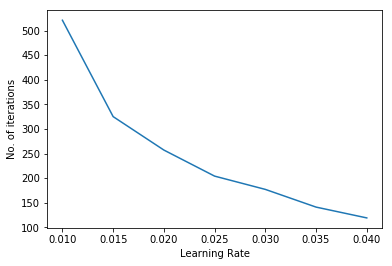

In [3]:
def main():
    weight_vec=np.random.random_sample(num_features)
    learning_rates=np.arange(0.01,0.045,0.005)
    no_iter=[]
    limit=0.0001
    
    #The following code tries out various learning rates to find the best one.
    for j in range(len(learning_rates)):
        weight_vec=np.random.random_sample(num_features)
        lr=learning_rates[j]
        iters=0
        counter=0
        
        #Iterations of learning are stopped when the cumulative/batch error is less than a specified 
        #limit for more than 3 continuous iterations.
        while(counter<3):
            
            iters+=1
            cumul_error=0
            
            #The change in weight or delta for a particular iteration is summed up over all input data 
            #patterns and added to the weight vector at the end of the iteration.
            change_in_weight = np.zeros(num_features)
            
            
            for i in range(training_size):
                input_vec=input_mat[i][0:num_features]
                trueVal=input_mat[i][num_features]
                pred=0
                
                for k in range(num_features):
                    pred+=(input_vec[k]*weight_vec[k])
                err_val=(trueVal-pred)
                
                #The change in weight vector is accumulated, but is added to the weight vector only 
                #at the end of the iteration
                change_in_weight += weight_change(err_val,input_vec,lr)
                cumul_error+=err_val
            
            weight_vec += change_in_weight  #The weight vector is changed after an iteration of training
                                            #is complete.
            
            #Updating counter for checking if convergence has been reached to stop the learning.
            if(np.absolute(cumul_error)<limit): 
                counter+=1  
            else:
                counter=0
                
        no_iter.append(iters)
        
    #Plotting the graph    
    plt.plot(np.arange(0.01,0.045,0.005),no_iter) 
    plt.xlabel('Learning Rate')
    plt.ylabel('No. of iterations')
    
    
    return weight_vec
       
weight_vec=main()

In [4]:
#Testing the model on some testing data:
for i in range(training_size):
    input_vec=input_mat[i][0:num_features]
    pred=0
    for i in range(num_features):
            pred+=(input_vec[i]*weight_vec[i])  #Using the weight vector learned from training to
                                                #generate predictions
    if(pred<0.5):
        print('T')
    else:
        print('J')

    

T
J
T
J
T
J
T
J
